<a href="https://colab.research.google.com/github/as9786/ParrotnlpJeju/blob/main/toxic_0401_GloVe_Honghee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install glove_python_binary

     |████████████████████████████████| 952kB 18.8MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Embedding, Input, LSTM, Bidirectional, GlobalMaxPool1D, Dropout, Flatten
#Bidirectional은 양방향으로 데이터를 보기 위해서 사용되는 함수
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


In [ ]:
DATA_PATH = '/content/drive/MyDrive/2021_봄/패럿/toxic'

In [ ]:
train_df = pd.read_csv(DATA_PATH+'/data/train.csv')
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
X_train = train_df.comment_text
y_train = train_df[["toxic",	"severe_toxic",	"obscene",	"threat",	"insult",	"identity_hate"]].values

In [ ]:
num_words = 70000
max_len = 150

In [ ]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(list(X_train))
word_index = tokenizer.word_index

In [ ]:
word_index = {e:i for e,i in word_index.items() if i <= num_words} # tokenizer의 num_words가 단어의 개수를 제어해주지 못하기 때문에 인위적으로 단어 개수 제한

In [ ]:
len(word_index)

70000

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)

In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen = max_len)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2021-04-01 02:10:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-01 02:10:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-01 02:10:43--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
n=0
f = open('glove.6B.300d.txt', encoding="utf8") # 단어를 300차원으로 표현

for line in f:
    word_vector = line.split() # 각 줄을 읽어와서 word_vector에 저장.
    print(word_vector) # 각 줄을 출력
    word = word_vector[0] # word_vector에서 첫번째 값만 저장
    print(word) # word_vector의 첫번째 값만 출력
    n=n+1
    if n==2:
        break
f.close()

['the', '0.04656', '0.21318', '-0.0074364', '-0.45854', '-0.035639', '0.23643', '-0.28836', '0.21521', '-0.13486', '-1.6413', '-0.26091', '0.032434', '0.056621', '-0.043296', '-0.021672', '0.22476', '-0.075129', '-0.067018', '-0.14247', '0.038825', '-0.18951', '0.29977', '0.39305', '0.17887', '-0.17343', '-0.21178', '0.23617', '-0.063681', '-0.42318', '-0.11661', '0.093754', '0.17296', '-0.33073', '0.49112', '-0.68995', '-0.092462', '0.24742', '-0.17991', '0.097908', '0.083118', '0.15299', '-0.27276', '-0.038934', '0.54453', '0.53737', '0.29105', '-0.0073514', '0.04788', '-0.4076', '-0.026759', '0.17919', '0.010977', '-0.10963', '-0.26395', '0.07399', '0.26236', '-0.1508', '0.34623', '0.25758', '0.11971', '-0.037135', '-0.071593', '0.43898', '-0.040764', '0.016425', '-0.4464', '0.17197', '0.046246', '0.058639', '0.041499', '0.53948', '0.52495', '0.11361', '-0.048315', '-0.36385', '0.18704', '0.092761', '-0.11129', '-0.42085', '0.13992', '-0.39338', '-0.067945', '0.12188', '0.16707', '0

In [ ]:
print(type(word_vector))
print(len(word_vector))

<class 'list'>
301


In [ ]:
import numpy as np
embedding_dict = dict()
f = open('glove.6B.300d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 300개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()
print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [ ]:
print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

[-5.9430e-02  2.9373e-01  4.4671e-01  2.4423e-01 -1.5634e-01  2.8773e-01
  6.7747e-02  2.0504e-01  4.1492e-02 -3.0522e-01 -4.3004e-02  2.8197e-01
  6.2618e-02  5.0430e-01 -4.0581e-01 -1.4415e-01 -2.9910e-01  7.0448e-02
 -5.3740e-02 -6.1705e-01 -3.9854e-01 -9.5942e-02  1.0248e-02  5.4411e-01
  1.7266e-01  8.3997e-02  2.8430e-01  1.0357e-01  4.8725e-01  4.5660e-01
 -6.1109e-01  6.4805e-02 -7.0994e-03 -3.6287e-01 -7.9061e-01  3.7435e-01
 -9.2787e-02  4.0281e-01  2.4042e-01 -9.2453e-02  4.7018e-01  5.6912e-01
  6.5189e-02 -4.7954e-01  1.9341e-01  3.4634e-01  2.8264e-01  6.5834e-04
  2.4984e-01  1.0720e-01 -3.6387e-01 -1.6954e-01  2.0574e-01 -1.0885e-03
  2.1150e-01 -1.2830e-01  2.5518e-01 -1.4915e-01 -1.8501e-01 -6.8867e-02
 -2.6199e-01 -3.7595e-01  1.6882e-01  3.7629e-01  1.4882e-01  6.5637e-02
  5.7059e-01 -3.5715e-01  2.4602e-01  1.8475e-01 -7.2171e-02 -3.9930e-01
 -1.2116e-01 -6.8676e-02 -7.9098e-02  4.4554e-02 -3.2147e-01 -5.8227e-04
  1.3248e-01  2.3804e-01 -6.5126e-01  4.4838e-02 -9

In [ ]:
embedding_matrix = np.zeros((num_words, 300))
# 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
np.shape(embedding_matrix)


(70000, 300)

In [ ]:
embedding_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(word_index)

70000

In [ ]:
for word, i in word_index.items():
  tmp = embedding_dict.get(word)
  if tmp is not None:
    embedding_matrix[i-1] = tmp

In [ ]:
def model():
  inp = Input(shape = (max_len, ))
  layer = Embedding(num_words, 300, weights=[embedding_matrix], input_length=max_len, trainable=True)(inp)
  layer = Bidirectional(LSTM(50, return_sequences= True, recurrent_dropout=0))(layer)
  layer = GlobalMaxPool1D()(layer)
  layer = Dropout(0.2)(layer)
  layer = Dense(50, activation= 'relu')(layer)
  layer = Dropout(0.2)(layer)
  layer = Dense(6, activation= 'sigmoid')(layer)
  model = Model(inputs = inp, outputs = layer)
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [ ]:
model = model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 300)          21000000  
_________________________________________________________________
bidirectional (Bidirectional (None, 150, 100)          140400    
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0     

In [ ]:
file_path = DATA_PATH +'/data'
checkpoint = ModelCheckpoint(file_path, monitor= 'val_loss', verbose = 1, save_best_only=True)
early_stop = EarlyStopping(monitor= 'val_loss', patience= 1)

In [ ]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.2, callbacks=[checkpoint, early_stop])

Epoch 1/2
3990/3990 [==============================] - 826s 199ms/step - loss: 0.0931 - accuracy: 0.8090 - val_loss: 0.0479 - val_accuracy: 0.9941

Epoch 00001: val_loss improved from inf to 0.04791, saving model to /content/drive/MyDrive/2021_봄/패럿/toxic/data


INFO:tensorflow:Assets written to: /content/drive/MyDrive/2021_봄/패럿/toxic/data/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/2021_봄/패럿/toxic/data/assets


Epoch 2/2
3990/3990 [==============================] - 813s 204ms/step - loss: 0.0420 - accuracy: 0.9767 - val_loss: 0.0461 - val_accuracy: 0.9941

Epoch 00002: val_loss improved from 0.04791 to 0.04613, saving model to /content/drive/MyDrive/2021_봄/패럿/toxic/data


INFO:tensorflow:Assets written to: /content/drive/MyDrive/2021_봄/패럿/toxic/data/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/2021_봄/패럿/toxic/data/assets


In [ ]:
import matplotlib.pyplot as plt
def acc_loss_plot(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc = 'upper left')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.show()

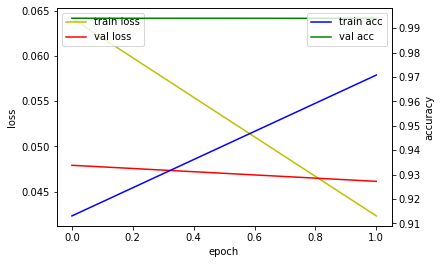

In [ ]:
acc_loss_plot(hist)

In [ ]:
model.save('/content/drive/MyDrive/2021_봄/패럿/toxic/toxic1_model3.h5')

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/2021_봄/패럿/toxic/data/test.csv')
test_df = test_df['comment_text']
test_final = tokenizer.texts_to_sequences(test_df)
test_padded =sequence.pad_sequences(test_final, maxlen=150)

In [ ]:
### Prediction for test data
predict = model.predict(test_padded)

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/2021_봄/패럿/toxic/data/sample_submission.csv')

In [ ]:
sample_submission.iloc[:, 1:] = predict
sample_submission.to_csv("/content/drive/MyDrive/2021_봄/패럿/toxic/sub_0401.csv", index=False)

In [ ]:
# privare score 0.97569
# public score 0.97403

